## 데이터 불러오고 결합하기

In [21]:
import pandas as pd

In [22]:
df_total=pd.DataFrame()

In [23]:
## 파일 불러오고 합치기
df_total=pd.DataFrame()
for i in range (1,81,1):
    file_path = './포항/trfcard({})/trfcard.csv'.format(i)
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    df_total = pd.concat([df_total, df])

In [24]:
df_total

,on_date,off_date,route_name,descr,age_type,trans_yn,addfee_yn,start_bstop,start_gps_x,start_gps_y,end_bstop,end_gps_x,end_gps_y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,20200327232513,20200327232800,101,양덕-고속터미널-동해,일반,Y,N,포은중앙도서관,129.367873,36.043187,롯데아파트,129.377403,36.056943
4979,20200327232740,20200327233319,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,우현경로당,129.362232,36.049878
4980,20200327232829,20200327233446,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,시외버스터미널,129.350290,36.013280,연일파출소,129.345750,35.997470
4981,20200327233328,20200327233442,107,문덕-시외(고속)터미널-흥해,일반,N,N,우현경로당,129.362232,36.049878,도심환승센터,129.365165,36.043435


## 컬렴명 한글으로 변경하기

In [25]:
col_name = pd.read_excel('./포항/컬럼명.xlsx', header=11)
col_name

,컬럼명(한글),컬럼명(영문),컬럼 설명,데이터 타입,코드값 여부,코드 테이블,비고
0,승차시각,on_date,승차시각,datetime,N,NaN,NaN
1,하차시각,off_date,하차시각,datetime,N,NaN,NaN
2,노선명,route_name,노선명,varchar,N,NaN,NaN
3,노선설명,descr,노선설명,varchar,N,NaN,NaN
4,승객연령,age_type,승객연령,varchar,N,NaN,NaN
5,환승여부,trans_yn,환승여부,varchar,N,NaN,NaN
6,추가운임여부,addfee_yn,추가운임여부,varchar,N,NaN,NaN
7,승차정류장,start_bstop,승차정류장,varchar,N,NaN,NaN
8,승차정류장 GPS X,start_gps_x,승차정류장 GPS X,numeric,N,NaN,NaN
9,승차정류장 GPS Y,start_gps_y,승차정류장 GPS Y,numeric,N,NaN,NaN


In [26]:
## 한글컬럼명으로 변경
kor_col = []
for j in range (len(col_name)):
    kor_col.append(col_name['컬럼명(한글)'][j])
print(kor_col)

['승차시각', '하차시각', '노선명', '노선설명', '승객연령', '환승여부', '추가운임여부', '승차정류장', '승차정류장 GPS X', '승차정류장 GPS Y', '하차정류장', '하차정류장 GPS X', '하차정류장 GPS Y']


In [27]:
df_total.columns = kor_col

In [28]:
df_total.head()

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826


In [29]:
trans = df_total[['승차정류장','환승여부']]
trans

,승차정류장,환승여부
0,양덕차고지,N
1,문덕사거리,N
2,문덕사거리,N
3,부영사랑3차,N
4,문덕온천,N
...,...,...
4978,포은중앙도서관,Y
4979,KTX포항역(시내행),N
4980,시외버스터미널,N
4981,우현경로당,N


## 정류장별 환승빈도 구하기

In [30]:
trans30 = trans[trans['환승여부']=='Y'].groupby('승차정류장').count().reset_index().sort_values('환승여부',ascending=False).reset_index(drop=True).head(30)
trans30.columns = ['승차정류장','환승빈도']

In [31]:
trans30

,승차정류장,환승빈도
0,죽도시장,11035
1,시외버스터미널,7422
2,중앙상가,3240
3,남구보건소,3215
4,구룡포환승센터,1951
5,선린병원,1670
6,육거리,1506
7,북구청,1198
8,흥해환승센터,1039
9,홈플러스,872


## 그래프 시각화

In [32]:
import matplotlib.pyplot as plt

In [33]:
k = []
for x in range(len(trans30)):
    k.append(trans30['승차정류장'][x])
k

['죽도시장',
 '시외버스터미널',
 '중앙상가',
 '남구보건소',
 '구룡포환승센터',
 '선린병원',
 '육거리',
 '북구청',
 '흥해환승센터',
 '홈플러스',
 '대동우방아파트',
 '기계환승센터',
 '양덕차고지',
 '북부시장',
 '우현경로당',
 '문덕사거리',
 '오천농협세계지점',
 '교보생명',
 'GS슈퍼마켓',
 '현대제철',
 '오거리',
 '해도119안전센터',
 '구룡포근대화거리',
 '롯데아파트',
 '오천시장',
 'SK뷰2차',
 '장성초등학교',
 '포은중앙도서관',
 '건강가정다문화센터',
 '롯데백화점']

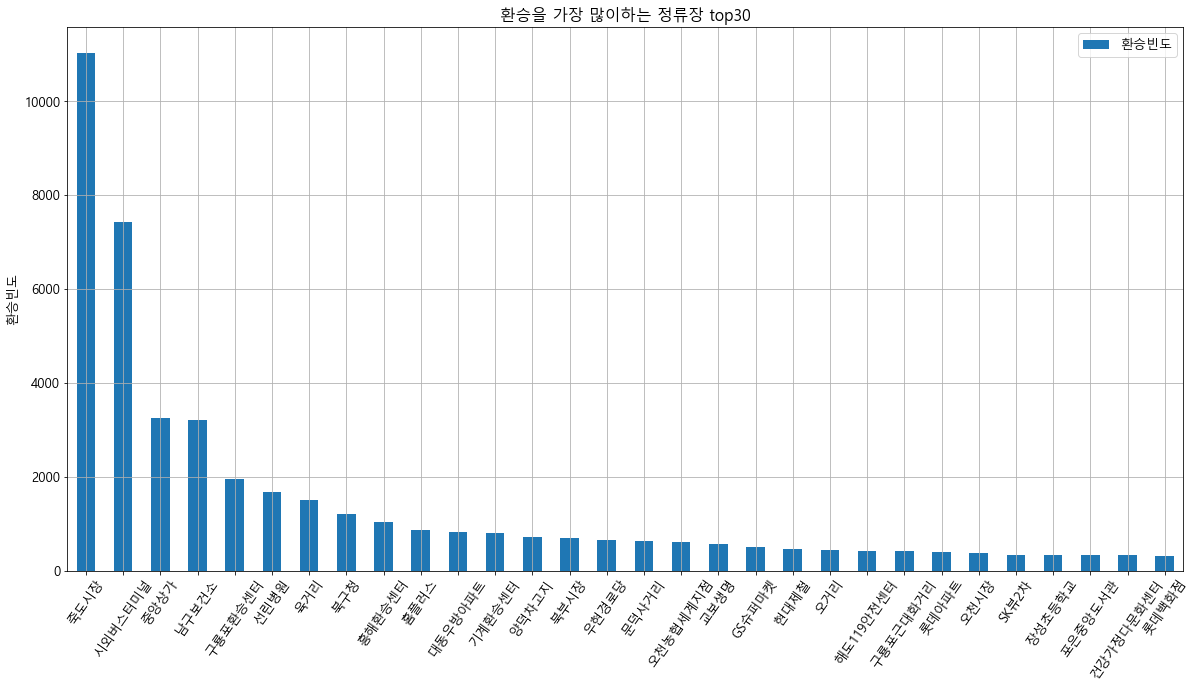

In [34]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=13)

# 데이터 넣기
trans30.plot(kind='bar')

plt.title("환승을 가장 많이하는 정류장 top30")
plt.ylabel("환승빈도")

# x축 범위?
a = list(range(0,29,1))
plt.xticks([i for i in range(0,30,1)], k, rotation = 55)

# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()

'''\
환승을 가장 많이 하는 순서는 죽도시장, 시외버스터미널, 중앙상가, 남구보건소 순이다\
1,2위는 3,4위의 3배, 2배가 될 정도로 많이 환승한다\
pieplot으로 분석하면 1,2,3위가 전체에서 크기비교가 더 용이할 것 같다\
'''